<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
step5 : time series
</font>
</h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')
housing_extended

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,3,steel-concrete comosite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,4,steel-concrete comosite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete comosite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,2,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,3,steel-concrete comosite,0.333,has elevator,no subway,7,10.914652,5200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,4,steel-concrete comosite,0.500,has elevator,no subway,3,20.402633,2649.031297
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete comosite,0.333,no elevator,no subway,3,20.402633,2057.976127
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete comosite,0.222,has elevator,has subway,3,12.983181,3100.598461
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,3,steel-concrete comosite,0.500,has elevator,no subway,3,13.519291,3513.751590


we want make a report and analyse cities

we make new dataFrame and set "district" as index of them and calculate below items:
<ul>
<li>
pricePerSquare mean
</li>
<li>
house with elevator %
</li>
<li>
house with subway %
</li>
<li>
square mean
</li>
<li>
building age mean
</li>
<li>
frequent buildingStructure
</li>
</ul>

In [2]:
elevator_percent= housing_extended.groupby("district")["elevator"].value_counts()
elevator_percent= elevator_percent.unstack()["has elevator"]/housing_extended.groupby("district")["elevator"].count()*100


In [55]:
subway_percent= housing_extended.groupby("district")["subway"].value_counts()
subway_percent= subway_percent.unstack()["has subway"]/housing_extended.groupby("district")["subway"].count()*100

In [4]:
def find_max(arr):
    return arr.mode()

In [53]:
districts_df = pd.DataFrame()
mean_data=housing_extended.groupby("district").mean()

districts_df.insert( 0 , "pricePerSquare mean" , mean_data["pricePerSquare"].values)
districts_df.insert(1 , "% houses with elevator" , elevator_percent.values)
districts_df.insert(2 , "% houses with subway" , subway_percent)
districts_df.insert(3 , "square mean" , mean_data["square"].values)
districts_df.insert(4 , "building age mean" , 2021-housing_extended.groupby("district")["constructionTime"].mean())  
districts_df.insert(5 , "frequent buildingStructure" , housing_extended.groupby("district")["buildingStructure"].agg(find_max))
districts_df.index = range(1,14)

In [54]:

districts_df

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,building age mean,frequent buildingStructure
1,5981.774965,56.216550,NaN,67.047856,NaN,NaN
2,3805.924811,68.647623,93.488404,76.951352,25.151709,steel-concrete comosite
3,3130.333142,66.636691,61.825544,92.071484,20.639123,steel-concrete comosite
4,2999.928821,39.983398,47.032374,86.322272,15.494604,steel-concrete comosite
5,2841.761483,80.077031,43.027117,89.297990,18.324364,mixed
6,2952.222451,37.892663,39.005602,100.121614,11.271359,steel-concrete comosite
7,4225.965657,66.746216,43.553669,78.845544,17.536464,mixed
8,5312.914827,51.883462,68.307898,73.615248,22.553717,steel-concrete comosite
9,3491.126972,46.534461,61.087404,73.047513,24.191570,steel-concrete comosite
10,6464.899480,48.030692,27.636823,62.386157,25.653835,steel-concrete comosite


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خط اول خروجی شما باید به شکل زیر باشد. (سطرها را بر اساس شماره منطقه مرتب کنید.)
</font>
</p>


|   district |   pricePerSquare mean |   % houses with elevator |   % houses with subway |   square mean |   buildeng age mean | frequent buildingStructure   |
|-----------:|----------------------:|-------------------------:|-----------------------:|--------------:|--------------------:|:-----------------------------|
|          1 |               5981.77 |                  56.216550 |                93.4884 |       67.0479 |             25.1517 | steel-concrete composite     |

first we must convert "tradeTime" to time format

In [56]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])

<ul>
<li>
The <code>resample</code> method is a powerful method for working with time series. With this method, rows can be grouped by time period. The <code>rule</code> parameter specifies the desired interval and the <code>on</code> parameter specifies the column in which the time is stored.
</li>
<li>
Create a photo containing one page axis and set its length and width to 8 inches.
</li>
<li>
Calculate the average price per square meter in monthly transactions using the <code>resample</code> method. Before 2010, less than ten deals have been done. Include transactions after 2010 in your calculations.
</li>
<li>
Using the pandas interface, plot the obtained data on the pivot plane you created earlier. Set the line color to <code>crimson</code>.
</li>

</ul>
<p style="text-align:center;"><img src="fig1.png"></p>

In [57]:
from datetime import datetime


my_df=housing_extended[ housing_extended["tradeTime"]>datetime(year=2009,month=12,day=31)]



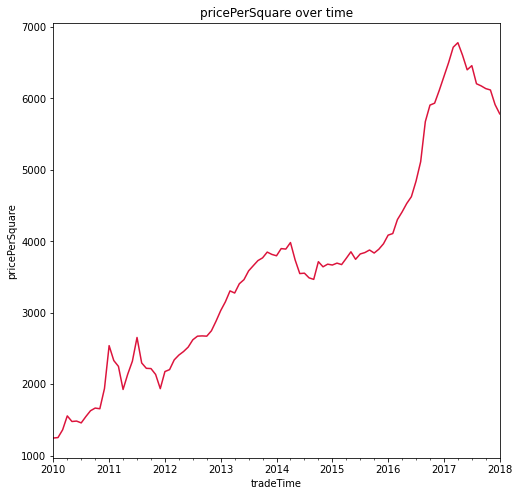

In [63]:

fig1 , ax1 = plt.subplots(figsize=(8,8))
my_df.resample(on="tradeTime" , rule="1M")["pricePerSquare"].mean().plot(ax=ax1 , color="crimson")
ax1.set_title("pricePerSquare over time")
ax1.set_ylabel("pricePerSquare");

Another rumor we want to investigate is the decrease in the <b> number </b> of home deals near downtown. This chart is the same as the previous chart and you should make these changes in it.

<ul>

   <li>
The time period is 3 months instead of a month, and in addition to the fact that only transactions after 2010 should be checked, the transactions of houses whose distance from the center is greater than or equal to 15 kilometers should also be excluded.
</li>
   <li>
Set the line color to <code>orange</code>.
</li>

<li>
Change the settings so that your output graph looks exactly like the figure below.
</li>

<li>
Note: first select the transactions after 2010, then use resample and finally count the number of houses whose distance is less than 15 km.</li>

</ul>

<p style="text-align:center;"><img src="fig2.png"></p>

In [61]:
def count_check(arr):
    return arr[arr["distanceToCapital"]<15]["distanceToCapital"].count()

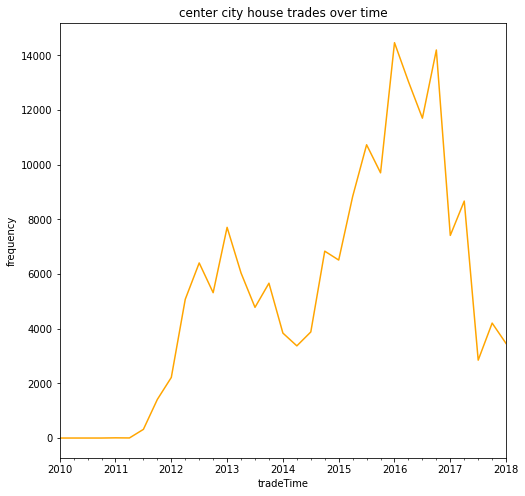

In [64]:

fig2 , ax2 = plt.subplots(figsize=(8,8))
my_df.resample(on="tradeTime" , rule="3M").agg(count_check).plot(ax=ax2, color = "orange")
ax2.set_title("center city house trades over time")
ax2.set_ylabel("frequency");